<a href="https://colab.research.google.com/github/Chandra142/SkillCraft_Internship/blob/main/SCT_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


✅ Sample Labeled Customers:



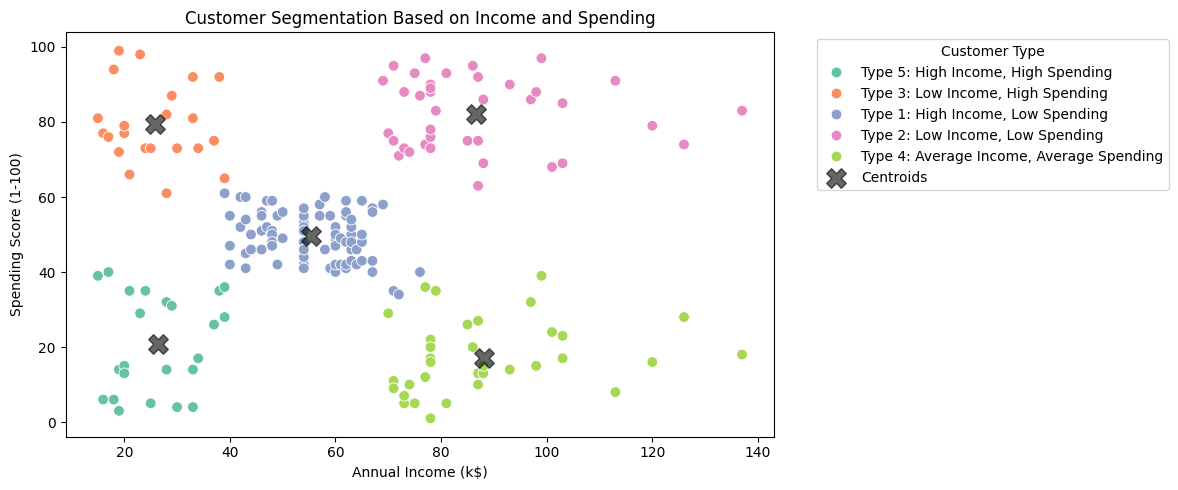

In [20]:
# ✅ Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ✅ Load the uploaded dataset
df = pd.read_csv('Mall_Customers.csv')

# ✅ Select features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# ✅ Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ✅ Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# ✅ Get original-scale cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# ✅ Define customer type labels (based on cluster numbers)
type_labels = {
    0: 'Type 1: High Income, Low Spending',
    1: 'Type 2: Low Income, Low Spending',
    2: 'Type 3: Low Income, High Spending',
    3: 'Type 4: Average Income, Average Spending',
    4: 'Type 5: High Income, High Spending'
}

# ✅ Add readable customer type column
df['Customer Type'] = df['Cluster'].map(type_labels)

# ✅ Show sample of labeled customers
print("\n✅ Sample Labeled Customers:\n")
# print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'Customer Type']].head())

# ✅ Plot the clustered customers
plt.figure(figsize=(12, 5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Customer Type',
    data=df,
    palette='Set2',
    s=60
)

# ✅ Plot cluster centers
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='black',
    s=200,
    alpha=0.6,
    marker='X',
    label='Centroids'
)

plt.title('Customer Segmentation Based on Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
